<a href="https://colab.research.google.com/github/swastikmhptr/MFL-Educlub/blob/master/MFL_educlub_Hands_On_AI_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![MFL Educlub](https://media-exp1.licdn.com/dms/image/C510BAQEa4YiQLYVD9A/company-logo_200_200/0?e=2159024400&v=beta&t=oxIBJWmm7pUxynrJtD_kIg4x2wc_psiGYdHqgaZXAOg)
# **Hands on AI Workshop**

### **Building custom Image classification Model**

**Importing important libraries**

In [1]:
#Keras utilities to build DL model
import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dropout, Flatten, Dense

# For opencv and plotting results
import cv2
from matplotlib import pyplot as plt
import numpy as np

#other utils
import random
from glob import glob as glob
import os
import random
from google.colab import files

Using TensorFlow backend.


**Uploading the Dataset to work on**

In [3]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataset.zip to dataset.zip
User uploaded file "dataset.zip" with length 3682282 bytes


In [4]:
!unzip dataset.zip
!cd dataset && ls

Archive:  dataset.zip
   creating: dataset/
   creating: dataset/test/
  inflating: dataset/test/2734949408_9ef81bac09_z.ngsversion.1516743050301.adapt.1900.1.jpg  
  inflating: dataset/test/6e37a81492be37b1967488a45dd4897e.jpg  
  inflating: dataset/test/Apples-Red-Delicious-group.jpg  
  inflating: dataset/test/Fresh-Apple-Fruit-Quality-Fresh-Apple-Red.jpg_300x300.jpg  
  inflating: dataset/test/murales_600-1-1.jpg  
  inflating: dataset/test/orange-fruit-picture.jpg  
  inflating: dataset/test/orange.jpg  
  inflating: dataset/test/orange_fruit_vitamins_263334.jpg  
   creating: dataset/train/
   creating: dataset/train/apple/
  inflating: dataset/train/apple/apple_001.jpg  
  inflating: dataset/train/apple/apple_002.jpg  
  inflating: dataset/train/apple/apple_003.jpg  
  inflating: dataset/train/apple/apple_004.jpg  
  inflating: dataset/train/apple/apple_005.jpg  
  inflating: dataset/train/apple/apple_006.jpg  
  inflating: dataset/train/apple/apple_007.jpg  
  inflating: datase

**Specifying Paths to the Dataset Directories and training parameters**

In [0]:
train_data_dir = 'dataset/train'
validation_data_dir = 'dataset/valid'
test_data_dir = 'dataset/test'
nb_train_samples = 96
nb_validation_samples = 24
epochs = 100
batch_size = 8
img_width, img_height = 224, 224

# Building Your Own CLassification Model

**Preprocessing Training and Validation Dataset, and creating Data Generators for Image Augmentation**

![Image Augmentation](https://www.pyimagesearch.com/wp-content/uploads/2019/07/keras_data_augmentation_header.png)

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


Found 96 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [7]:
classes= os.listdir(path='dataset/train/')
print(classes)

['apple', 'orange']


**Importing keras model and building finetuning section**

![VGG16 Classification](https://xgkfq28377.i.lithium.com/t5/image/serverpage/image-id/8241i196E2A78143567C5?v=1.0)

------------------------------------------------------------------------------

![Feature Extraction1](https://www.rsipvision.com/wp-content/uploads/2015/04/Slide6.png)


----------------------------------------------------------------------------
![Feature Extraction 2](https://developer.nvidia.com/sites/default/files/pictures/2018/convolutional_neural_network.png)

In [8]:
# build the VGG16 network
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
#Defining the classification part as a sequential model
top_model = Sequential()
#flattening the outputs from convolutional layers to feed into the fully connected layers.
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
#Adding 1st fully connected hidden layer with 512 neurons
top_model.add(Dense(512, activation='relu'))
#Adding 2nd fully connected hidden layer with 256 neurons
top_model.add(Dense(256, activation='relu'))
#Adding 3rd fully connected hidden layer with 128 neurons
top_model.add(Dense(128, activation='relu'))
#Adding 4th fully connected hidden layer with 64 neurons
top_model.add(Dense(64, activation='relu'))
#adding the final layer which will produce output confidence for classes 
top_model.add(Dense(2, activation='softmax'))

# Connecting the base convolutional model to the Fully connected classification model
model = Model(inputs=base_model.input, outputs=top_model(base_model.output))

#Now the Final Model is ready





58892288/58889256 [==============================] - 2s 0us/step






Model loaded.


**Compiling the model and freezing the Un-Trainable layers**

In [9]:
for layer in model.layers[:20]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate, to avoid overshooting minima.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-1, momentum=0.9),
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
train_log= model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    verbose=2)


Epoch 1/100
 - 9s - loss: 0.7541 - acc: 0.5000 - val_loss: 0.7448 - val_acc: 0.5000
Epoch 2/100
 - 1s - loss: 0.7688 - acc: 0.5000 - val_loss: 0.7448 - val_acc: 0.5000
Epoch 3/100
 - 1s - loss: 0.7690 - acc: 0.5104 - val_loss: 0.7448 - val_acc: 0.5000
Epoch 4/100
 - 1s - loss: 0.7535 - acc: 0.5000 - val_loss: 0.7448 - val_acc: 0.5000
Epoch 5/100
 - 1s - loss: 0.7688 - acc: 0.5000 - val_loss: 0.7448 - val_acc: 0.5000
Epoch 6/100
 - 1s - loss: 0.7741 - acc: 0.5000 - val_loss: 0.7448 - val_acc: 0.5000
Epoch 7/100
 - 1s - loss: 0.7617 - acc: 0.5000 - val_loss: 0.7448 - val_acc: 0.5000
Epoch 8/100
 - 1s - loss: 0.7633 - acc: 0.5104 - val_loss: 0.7448 - val_acc: 0.5000
Epoch 9/100
 - 1s - loss: 0.7616 - acc: 0.5104 - val_loss: 0.7448 - val_acc: 0.5000
Epoch 10/100
 - 1s - loss: 0.7524 - acc: 0.5000 - val_loss: 0.7448 - val_acc: 0.5000
Epoch 11/100
 - 1s - loss: 0.7588 - acc: 0.5000 - val_loss: 0.7448 - val_acc: 0.5000
Epoch 12/100
 - 1s - loss: 0.7628 - acc: 0.5000 - val_loss: 0.7448 - val_

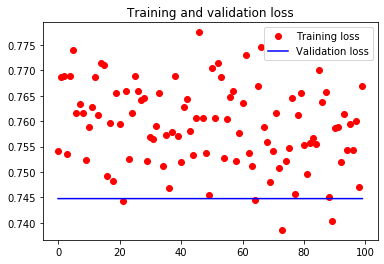

In [12]:
loss = train_log.history['loss']
val_loss = train_log.history['val_loss']
display_range = range(50)
plt.figure()
plt.plot(display_range, loss, 'ro', label='Training loss')
plt.plot(display_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Loss is Not Converging**
Expected Graph shapes
![Expected](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/05/history_validation_dataset.png)

-----------------------------------------------------------------------------

![expected2](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/11/Line-Plots-of-KL-Divergence-Loss-and-Classification-Accuracy-over-Training-Epochs-on-the-Blobs-Multi-Class-Classification-Problem.png)

# Finetuning Pretrained Model

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

classes= os.listdir(path='dataset/train/')
print(classes)

Found 96 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
['apple', 'orange']


The below mentioned model is used for classifying 1000 classes

In [19]:
# build the VGG16 network
model = applications.VGG16(weights='imagenet', include_top=True, input_shape=(224,224,3))
print('Model loaded.')
print(model.summary())

Model loaded.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128

Function to replace individual layers of a keras model

In [0]:
def replace_intermediate_layer(model, layer_id, new_layer):
    from keras.models import Model

    layers = [l for l in model.layers]

    x = layers[0].output
    for i in range(1, len(layers)):
        if i == layer_id:
            x = new_layer(x)
        else:
            x = layers[i](x)

    new_model = Model(input=layers[0].input, output=x)
    return new_model

Printing the details of the model

In [21]:
layers = [l for l in model.layers]
print(len(layers))
print(layers)

23
[<keras.engine.input_layer.InputLayer object at 0x7f5dbd0ff588>, <keras.layers.convolutional.Conv2D object at 0x7f5dbd0ffa90>, <keras.layers.convolutional.Conv2D object at 0x7f5dbd0ff9e8>, <keras.layers.pooling.MaxPooling2D object at 0x7f5dbd0b4ef0>, <keras.layers.convolutional.Conv2D object at 0x7f5dbd0bd898>, <keras.layers.convolutional.Conv2D object at 0x7f5dbd0bdeb8>, <keras.layers.pooling.MaxPooling2D object at 0x7f5dbd0ca4e0>, <keras.layers.convolutional.Conv2D object at 0x7f5dbd0d0630>, <keras.layers.convolutional.Conv2D object at 0x7f5dbd0d85f8>, <keras.layers.convolutional.Conv2D object at 0x7f5dbd0df320>, <keras.layers.pooling.MaxPooling2D object at 0x7f5dbd0e6c18>, <keras.layers.convolutional.Conv2D object at 0x7f5dbd074c18>, <keras.layers.convolutional.Conv2D object at 0x7f5dbd07b470>, <keras.layers.convolutional.Conv2D object at 0x7f5dbd07f2e8>, <keras.layers.pooling.MaxPooling2D object at 0x7f5dbd086c50>, <keras.layers.convolutional.Conv2D object at 0x7f5dbd096710>, <k

So there are a maximum of 23 layers, hence the index of the last layer will be 22

In [22]:
model = replace_intermediate_layer(model, 22, Dense(2, activation='softmax'))
print(model.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]


In [0]:
for layer in model.layers[:20]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [25]:
# fine-tune the model
train_log= model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 135ms/step - loss: 0.5167 - acc: 0.7083 - val_loss: 0.6497 - val_acc: 0.6250
Epoch 2/100
12/12 [==============================] - 1s 117ms/step - loss: 0.4283 - acc: 0.8333 - val_loss: 0.6996 - val_acc: 0.6250
Epoch 3/100
12/12 [==============================] - 1s 115ms/step - loss: 0.3538 - acc: 0.8854 - val_loss: 0.5723 - val_acc: 0.7083
Epoch 4/100
12/12 [==============================] - 1s 115ms/step - loss: 0.3506 - acc: 0.8750 - val_loss: 0.6265 - val_acc: 0.6667
Epoch 5/100
12/12 [==============================] - 1s 120ms/step - loss: 0.3897 - acc: 0.8438 - val_loss: 0.6284 - val_acc: 0.6667
Epoch 6/100
12/12 [==============================] - 1s 118ms/step - loss: 0.4418 - acc: 0.7812 - val_loss: 0.6043 - val_acc: 0.6667
Epoch 7/100
12/12 [==============================] - 1s 111ms/step - loss: 0.3294 - acc: 0.8646 - val_loss: 0.5572 - val_acc: 0.8333
Epoch 8/100
12/12 [==============================] - 1s 124ms/step - 

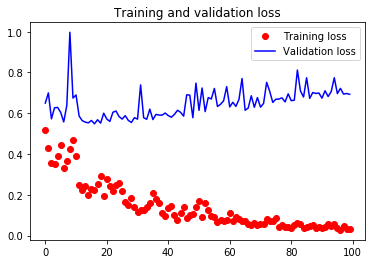

In [26]:
loss = train_log.history['loss']
val_loss = train_log.history['val_loss']
display_range = range(epochs)
plt.figure()
plt.plot(display_range, loss, 'ro', label='Training loss')
plt.plot(display_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Save the trained Classification Model**

In [0]:
model.save("best_weights.h5")

# Inferencing the Trained Classification Model

**Load the keras model with the weihgts**

In [0]:
import keras
inference_model = keras.models.load_model("best_weights.h5")

**Import dataset**

In [29]:
images_test1=glob(os.path.join("dataset/test/","*.jpg"))
images_test2=glob(os.path.join("dataset/test/","*.jpeg"))
images_test=images_test1+images_test2
random.shuffle(images_test)
print(len(images_test))
if len(images_test)!=0:
  image=cv2.imread(str(images_test[0]))
else:
  print("Test folder empty")

8


**Preprocess imported dataset**

In [30]:
preprocessed_test_images=[]
for i in range(len(images_test)):
  image_in=cv2.imread(str(images_test[i]))
  image_in=cv2.cvtColor(image_in,cv2.COLOR_BGR2RGB)
  image_in=cv2.resize(image_in,(224,224))
  image_in=image_in/255
  preprocessed_image=image_in.reshape((1,224,224,3))
  preprocessed_test_images.append(preprocessed_image)

print(len(preprocessed_test_images))

8


**Function to plot matplotlib graphs**

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None, classes=["Unknown"]):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        index = np.argmax(titles[i])
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(str(classes[index])+" "+str(titles[i][0,index]), fontsize=16)
        plt.imshow(ims[i])

In [0]:
def plot_val_with_title(images_test,preprocessed_test_images, title,classes):
    imgs = [cv2.cvtColor(cv2.imread(str(x)),cv2.COLOR_BGR2RGB) for x in images_test ]
    title_probs = [inference_model.predict(x) for x in preprocessed_test_images]
    print(title)
    return plots(imgs, rows=2, titles=title_probs, figsize=(16,8),classes=classes) if len(imgs)>0 else print('Not Found.')

**Plotting the final results**

Test_results


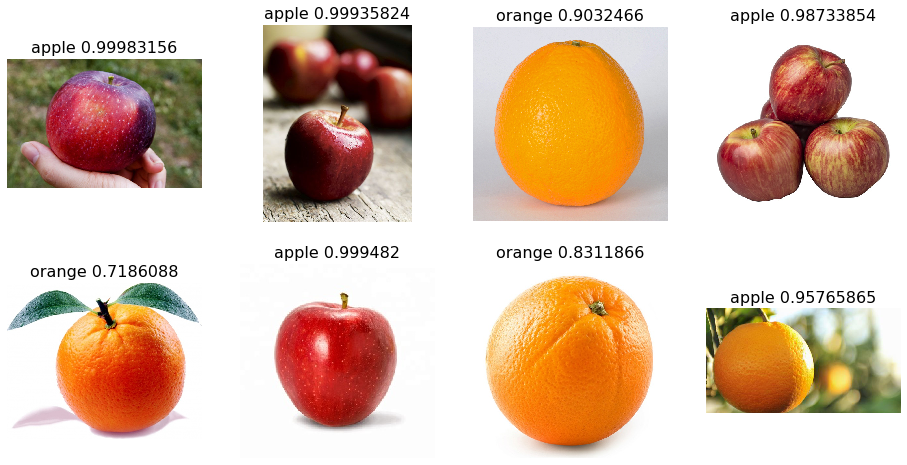

In [33]:
plot_val_with_title(images_test,preprocessed_test_images, "Test_results",classes)

# Test on your own image

In [0]:
def inference_model_1_image(model,image_name,classes):
  image_in=cv2.imread(str(image_name))
  image_in=cv2.cvtColor(image_in,cv2.COLOR_BGR2RGB)
  image=cv2.resize(image_in,(224,224))
  image=image/255
  preprocessed_image=image.reshape((1,224,224,3))
  result=model.predict(preprocessed_image)
  result_index= np.argmax(result)
  f = plt.figure(figsize=(6,6))
  print("Result= "+str(classes[result_index])+" "+str(result[0,result_index]))
  #f.set_title(str(classes[result_index])+" "+str(result[0,result_index]), fontsize=16)
  plt.imshow(image_in)  

**Upload Your Image**

In [48]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test2.jpg to test2.jpg
User uploaded file "test2.jpg" with length 107018 bytes


**Specify name of the uploaded image**

In [0]:
image_name="test2.jpg"

Now finally inference your model and obtain results

Result= apple 0.69785947


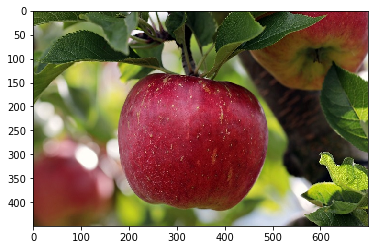

In [50]:
inference_model_1_image(inference_model,str(image_name),classes)

## Now You can try building Models with different classes of your choice or different number of classes

**Try with 3 different classes**